<a href="https://colab.research.google.com/github/AswinPrasad2001/Data-Science-Projects/blob/main/PRCP_1004_%E2%80%93_FIFA_20_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective: Using clustering algorithms to categorize similar players using their traits and their different skills in the field.

# **Problem Statement**

The objective of this project is to group FIFA 20 players into meaningful clusters based on their in-game attributes and positional ratings. Instead of manually inspecting thousands of players, the goal is to apply unsupervised learning techniques such as K-Means clustering (and optionally Gaussian Mixture Models) to automatically discover similar player profiles. These clusters can help scouts, analysts, and gamers quickly identify types of players such as creative midfielders, attacking forwards, or defensive specialists based on their skill attributes.

# **Introduction**

FIFA 20 provides a rich dataset of professional football players with detailed information on overall rating, potential, value, wage, positional attributes, and various technical, physical, and mental skills. With such a large number of variables, it becomes difficult to intuitively understand how players are distributed and which players share similar characteristics.

Unsupervised learning, particularly clustering, offers a powerful approach to uncover hidden structure in high-dimensional data. By converting textual ratings into numeric form (for example, “82+2” to 84), cleaning missing values, and standardizing attributes, we can create a uniform feature set that represents a player’s quality and role on the field. Dimensionality reduction using Principal Component Analysis (PCA) further helps retain the most significant variance while making clusters easier to visualize and interpret.

Using the processed dataset, clustering models such as K-Means are trained to group players into distinct clusters. Each cluster represents a specific player profile, characterized by differences in overall rating, potential, market value, wages, and positional strengths. These insights support a variety of use cases, including squad building, talent identification, and comparing star players in a more objective and data-driven manner.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



file_path = '/content/drive/My Drive/Datasets/players_20.csv'
players_df = pd.read_csv(file_path)

players_df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [ ]:
players_df.shape

(18278, 104)

In [ ]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [ ]:
players_df.describe(include='O')

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278,18278,18278,18278,18278,18278,18278,18278,18278,18278,...,16242,16242,16242,16242,16242,16242,16242,16242,16242,16242
unique,18278,17354,18218,6142,162,698,643,2,9,10,...,98,98,98,98,98,96,110,110,110,96
top,https://sofifa.com/player/233449/ximing-pan/20...,J. Rodríguez,Liam Kelly,1992-02-29,England,Wolverhampton Wanderers,CB,Right,Medium/Medium,Normal,...,59+2,59+2,59+2,59+2,59+2,61+2,63+2,63+2,63+2,61+2
freq,1,11,3,113,1667,33,2322,13960,9875,10750,...,682,636,636,636,682,667,621,621,621,667


In [ ]:
players_df.describe(include='O').columns

Index(['player_url', 'short_name', 'long_name', 'dob', 'nationality', 'club',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'player_tags', 'team_position', 'loaned_from', 'joined',
       'nation_position', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

In [ ]:
players_df.describe(exclude='O').columns

Index(['sofifa_id', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positionin

In [ ]:
players_df[players_df.describe(include='O').columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_url        18278 non-null  object
 1   short_name        18278 non-null  object
 2   long_name         18278 non-null  object
 3   dob               18278 non-null  object
 4   nationality       18278 non-null  object
 5   club              18278 non-null  object
 6   player_positions  18278 non-null  object
 7   preferred_foot    18278 non-null  object
 8   work_rate         18278 non-null  object
 9   body_type         18278 non-null  object
 10  real_face         18278 non-null  object
 11  player_tags       1499 non-null   object
 12  team_position     18038 non-null  object
 13  loaned_from       1048 non-null   object
 14  joined            16990 non-null  object
 15  nation_position   1126 non-null   object
 16  player_traits     7566 non-null   object
 17  ls          

In [ ]:
players_df[players_df.describe(exclude='O').columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18278 non-null  int64  
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   overall                     18278 non-null  int64  
 5   potential                   18278 non-null  int64  
 6   value_eur                   18278 non-null  int64  
 7   wage_eur                    18278 non-null  int64  
 8   international_reputation    18278 non-null  int64  
 9   weak_foot                   18278 non-null  int64  
 10  skill_moves                 18278 non-null  int64  
 11  release_clause_eur          16980 non-null  float64
 12  team_jersey_number          18038 non-null  float64
 13  contract_valid_until        180

In [ ]:
players_df[players_df.describe(include='int').columns].isnull().sum()

,0
sofifa_id,0
age,0
height_cm,0
weight_kg,0
overall,0
potential,0
value_eur,0
wage_eur,0
international_reputation,0
weak_foot,0


In [ ]:
players_df[players_df.describe(include='float').columns].isnull().sum()

,0
release_clause_eur,1298
team_jersey_number,240
contract_valid_until,240
nation_jersey_number,17152
pace,2036
shooting,2036
passing,2036
dribbling,2036
defending,2036
physic,2036


In [ ]:
players_df[players_df.describe(include='O').columns].isnull().sum()

,0
player_url,0
short_name,0
long_name,0
dob,0
nationality,0
club,0
player_positions,0
preferred_foot,0
work_rate,0
body_type,0


In [ ]:
countries= players_df['nationality'].value_counts().head(10)
countries

,count
nationality,
England,1667
Germany,1216
Spain,1035
France,984
Argentina,886
Brazil,824
Italy,732
Colombia,591
Japan,453


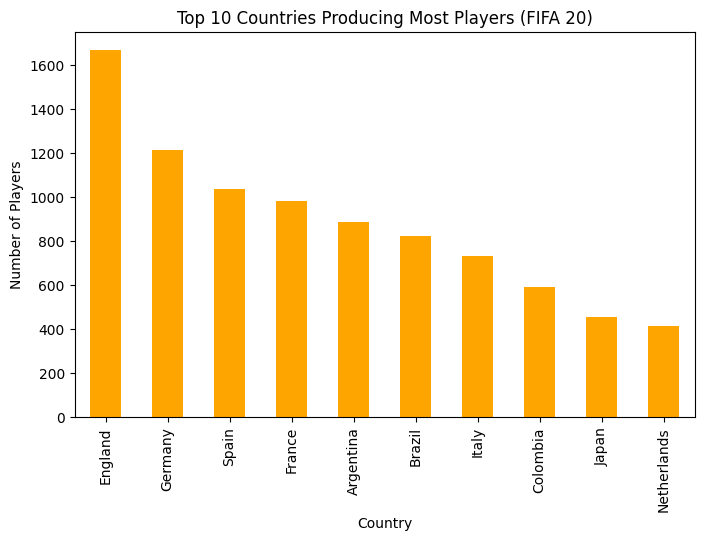

In [ ]:
# Plot the top 10 countries
countries.plot(kind='bar', figsize=(8,5), color='orange')
plt.title('Top 10 Countries Producing Most Players (FIFA 20)')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.show()

- England has the most players (1667), showing its strong football presence.
- European countries dominate the list, with most top nations from Europe.
- Argentina and Brazil are the leading South American countries producing many players.

Messi vs Ronaldo Comparison

In [ ]:
messi = players_df[players_df['long_name'] == 'Lionel Andrés Messi Cuccittini']
messi

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2


In [ ]:
ronaldo = players_df[players_df['long_name'] == 'Cristiano Ronaldo dos Santos Aveiro']
ronaldo

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


In [ ]:
# Selecting key performance attributes for Messi vs Ronaldo comparison
skills = ['overall', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'skill_moves']
comparison = pd.DataFrame({
    'Skill': skills,
    'Messi': messi[skills].values[0],
    'Ronaldo': ronaldo[skills].values[0]
})
print(comparison)

         Skill  Messi  Ronaldo
0      overall   94.0     93.0
1         pace   87.0     90.0
2     shooting   92.0     93.0
3      passing   92.0     82.0
4    dribbling   96.0     89.0
5    defending   39.0     35.0
6       physic   66.0     78.0
7  skill_moves    4.0      5.0


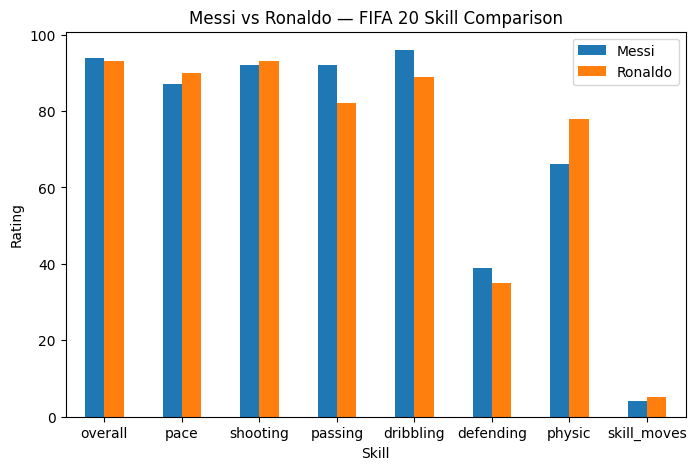

In [ ]:
comparison.plot(x='Skill', kind='bar', figsize=(8,5))
plt.title('Messi vs Ronaldo — FIFA 20 Skill Comparison')
plt.ylabel('Rating')
plt.xticks(rotation=0)
plt.show()


- Messi leads in passing and dribbling, highlighting his creativity and close control.
- Ronaldo excels in pace, shooting, and physicality, reflecting his power and athletic style.
- Both have similar overall ratings, showing they are nearly equal in overall ability.
- Defending is low for both.
- Skill moves are slightly higher for Ronaldo

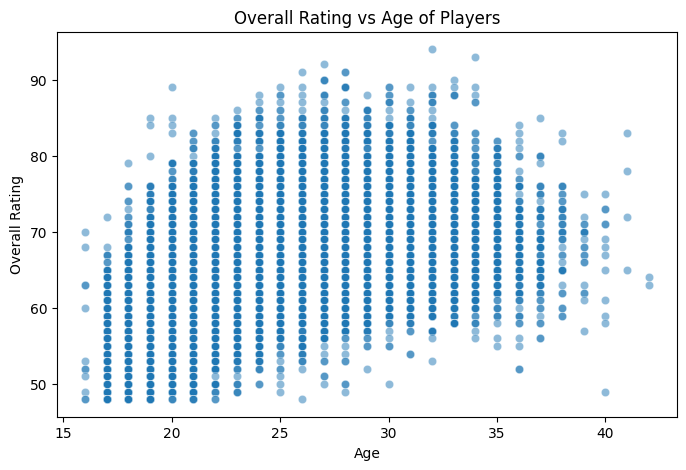

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=players_df, x='age', y='overall', alpha=0.5)
plt.title('Overall Rating vs Age of Players')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

- From the chart, we can see that players’ overall ratings generally increase until around age 27–29, which appears to be the peak performance window.
- After 30 years, the average overall rating starts to decline gradually, indicating that players begin to lose physical and performance attributes with age.

In [ ]:
offensive_players = players_df[
    players_df['player_positions'].str.contains('ST|RW|LW', na=False)
]
offensive_players['main_position'] = offensive_players['player_positions'].str.split(',').str[0]
avg_wage = offensive_players.groupby('main_position')['wage_eur'].mean().loc[['ST','RW','LW']]
print(avg_wage)

main_position
ST    10152.594888
RW    15848.238482
LW    14037.037037
Name: wage_eur, dtype: float64


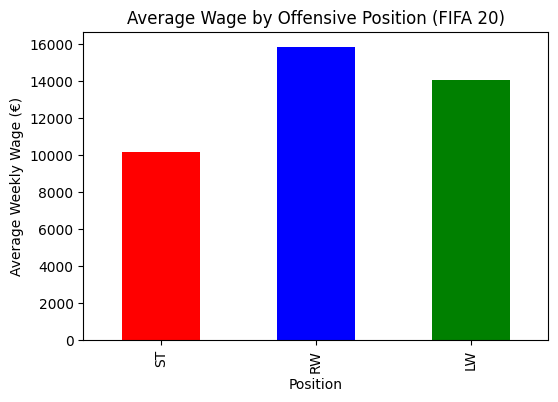

In [ ]:
avg_wage.plot(kind='bar', color=['red','blue','green'], figsize=(6,4))
plt.title('Average Wage by Offensive Position (FIFA 20)')
plt.xlabel('Position')
plt.ylabel('Average Weekly Wage (€)')
plt.show()


- Right-Wingers (RW) earn the highest average wage (~€16,000).

- Left-Wingers (LW) come next (~€14,000).

- Strikers (ST) earn slightly less (~€10,000), which may suggest that in FIFA 20 data, elite wingers tend to command higher wages due to their dual role in scoring and assisting.

In [ ]:
fifa_df = players_df.copy()
fifa_df.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [ ]:
#Dropping few unimportant columns from df
fifa_df.drop(['sofifa_id','player_url','short_name','dob','player_tags','player_traits'], axis=1, inplace=True)

In [ ]:
#Handling null values in categorical columns
fifa_df['team_position'].fillna('Unknown', inplace=True)
fifa_df['joined'].fillna('Unknown', inplace=True)

#Dropping it contain more than 17k+ null values
fifa_df.drop(['loaned_from', 'nation_position'], axis=1, inplace=True)

In [ ]:
import re

def convert_rating(value):
    if isinstance(value, str):
        match = re.match(r"(\d+)([+-]\d+)?", value)
        if match:
            base = int(match.group(1))
            adj = int(match.group(2)) if match.group(2) else 0
            return base + adj
    return None

for col in ['ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']:
    fifa_df[col] = fifa_df[col].apply(convert_rating)


In [ ]:
fifa_df[fifa_df.describe(include='float').columns].isnull().sum()

,0
release_clause_eur,1298
team_jersey_number,240
contract_valid_until,240
nation_jersey_number,17152
pace,2036
shooting,2036
passing,2036
dribbling,2036
defending,2036
physic,2036


In [ ]:
#Handling numeric columns only float type has null values.
f_cols = fifa_df.describe(include='float').columns
for col in f_cols:
    if col in ['gk_diving', 'gk_handling', 'gk_kicking', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']:
       fifa_df[col].fillna(0, inplace=True)
    else:
       fifa_df[col].fillna(fifa_df[col].median(), inplace=True)
#have more than 17k+ null values
fifa_df.drop('nation_jersey_number', axis=1, inplace=True)

In [ ]:
fifa_df[fifa_df.describe(include=['float','O']).columns].isnull().sum()

,0
long_name,0
nationality,0
club,0
player_positions,0
preferred_foot,0
work_rate,0
body_type,0
real_face,0
release_clause_eur,0
team_position,0


In [ ]:
fifa_df.describe(include='O').columns

Index(['long_name', 'nationality', 'club', 'player_positions',
       'preferred_foot', 'work_rate', 'body_type', 'real_face',
       'team_position', 'joined'],
      dtype='object')

In [ ]:
# AS focusing on skills based clustering only  keeping skill based columns.
fifa_skill_df = fifa_df.drop(['long_name', 'nationality', 'club',
                              'player_positions', 'team_position', 'joined'], axis=1)


In [ ]:
fifa_skill_df.describe(include='O').columns

Index(['preferred_foot', 'work_rate', 'body_type', 'real_face'], dtype='object')

In [ ]:
fifa_skill_df['preferred_foot'].value_counts()

,count
preferred_foot,
Right,13960
Left,4318


In [ ]:
fifa_skill_df['work_rate'].value_counts()

,count
work_rate,
Medium/Medium,9875
High/Medium,3216
Medium/High,1718
High/High,986
Medium/Low,886
High/Low,684
Low/Medium,461
Low/High,417
Low/Low,35


In [ ]:
#As work_rate column combines two different attributes, splitting it.
#Creating two different columns named 'attack_work_rate', 'defense_work_rate' and dropping 'work_rate'.
fifa_skill_df[['attack_work_rate', 'defense_work_rate']] = (
    fifa_skill_df['work_rate'].str.split('/', expand=True)
)

In [ ]:
fifa_skill_df.drop('work_rate', axis=1, inplace=True)

In [ ]:
fifa_skill_df['body_type'].value_counts()

,count
body_type,
Normal,10750
Lean,6505
Stocky,1016
Messi,1
C. Ronaldo,1
Neymar,1
PLAYER_BODY_TYPE_25,1
Courtois,1
Shaqiri,1


In [ ]:
#Observed incorrect values(messi, neymar,..) in body_type.Coverting those inocrrect vaues to Normal.
common_body_types = ['Normal', 'Lean', 'Stocky']
fifa_skill_df['body_type'] = fifa_skill_df['body_type'].apply(lambda x: x if x in common_body_types else 'Normal')

In [ ]:
fifa_skill_df['real_face'].value_counts()

,count
real_face,
No,16310
Yes,1968


In [ ]:
# Encode 'preferred_foot' and 'real_face' as binary values
fifa_skill_df['preferred_foot'] = fifa_skill_df['preferred_foot'].map({'Left': 0, 'Right': 1})
fifa_skill_df['real_face'] = fifa_skill_df['real_face'].map({'No': 0, 'Yes': 1})

# 'attack_work_rate' and 'defense_work_rate' to numeric scale
work_rate_map = {'Low': 0, 'Medium': 1, 'High': 2}
fifa_skill_df['attack_work_rate'] = fifa_skill_df['attack_work_rate'].map(work_rate_map)
fifa_skill_df['defense_work_rate'] = fifa_skill_df['defense_work_rate'].map(work_rate_map)

# One-hot encode 'body_type' since it has 3 categories (Normal, Lean, Stocky)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')
encoded_body = encoder.fit_transform(fifa_skill_df[['body_type']])
encoded_body_df = pd.DataFrame(encoded_body, columns=encoder.get_feature_names_out(['body_type']))
fifa_skill_df = pd.concat([fifa_skill_df.drop('body_type', axis=1), encoded_body_df], axis=1)

In [ ]:
fifa_skill_df.head(5)

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,...,lb,lcb,cb,rcb,rb,attack_work_rate,defense_work_rate,body_type_Lean,body_type_Normal,body_type_Stocky
0,32,170,72,94,94,95500000,565000,0,5,4,...,65.0,54.0,54.0,54.0,65.0,1,0,0.0,1.0,0.0
1,34,187,83,93,93,58500000,405000,1,5,4,...,64.0,56.0,56.0,56.0,64.0,2,0,0.0,1.0,0.0
2,27,175,68,92,92,105500000,290000,1,5,5,...,64.0,49.0,49.0,49.0,64.0,2,1,0.0,1.0,0.0
3,26,188,87,91,93,77500000,125000,1,3,3,...,59.0,59.0,59.0,59.0,59.0,1,1,0.0,1.0,0.0
4,28,175,74,91,91,90000000,470000,1,4,4,...,64.0,52.0,52.0,52.0,64.0,2,1,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(fifa_skill_df)
fifa_scaled_df = pd.DataFrame(scaled_data, columns=fifa_skill_df.columns)
fifa_scaled_df

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,...,lb,lcb,cb,rcb,rb,attack_work_rate,defense_work_rate,body_type_Lean,body_type_Normal,body_type_Stocky
0,1.442333,-1.681598,-0.464891,3.993662,3.657156,16.653625,26.019375,-1.798048,10.285902,1.588459,...,0.692409,-0.329151,-0.329151,-0.329151,0.692409,-0.418305,-2.158629,-0.743327,0.836165,-0.242606
1,1.871809,0.834394,1.095935,3.849772,3.494276,10.029126,18.525626,0.556159,10.285902,1.588459,...,0.582050,-0.149407,-0.149407,-0.149407,0.582050,1.506128,-2.158629,-0.743327,0.836165,-0.242606
2,0.368643,-0.941600,-1.032464,3.705883,3.331397,18.444030,13.139495,0.556159,10.285902,3.093037,...,0.582050,-0.778511,-0.778511,-0.778511,0.582050,1.506128,-0.165327,-0.743327,0.836165,-0.242606
3,0.153905,0.982394,1.663508,3.561993,3.494276,13.430896,5.411566,0.556159,5.006771,0.083880,...,0.030255,0.120210,0.120210,0.120210,0.030255,-0.418305,-0.165327,-0.743327,0.836165,-0.242606
4,0.583381,-0.941600,-0.181104,3.561993,3.168517,15.668902,21.569962,0.556159,7.646337,1.588459,...,0.582050,-0.508895,-0.508895,-0.508895,0.582050,1.506128,-0.165327,-0.743327,0.836165,-0.242606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,-0.705048,0.686395,0.528362,-2.625268,-2.532272,-0.437582,-0.349253,0.556159,-0.272361,0.083880,...,-1.294051,-0.868383,-0.868383,-0.868383,-1.294051,-0.418305,1.827975,-0.743327,0.836165,-0.242606
18274,-0.705048,-0.645601,-1.316251,-2.625268,-2.532272,-0.437582,-0.349253,0.556159,-0.272361,-1.420698,...,-1.183693,-0.778511,-0.778511,-0.778511,-1.183693,-0.418305,-0.165327,-0.743327,0.836165,-0.242606
18275,-1.349262,0.686395,-0.039211,-2.625268,-2.532272,-0.437582,-0.396089,0.556159,-0.272361,-1.420698,...,-1.073334,-0.598767,-0.598767,-0.598767,-1.073334,-2.342738,-0.165327,1.345302,-1.195936,-0.242606
18276,-1.564000,0.538395,-0.181104,-2.625268,-2.858031,-0.437582,-0.396089,0.556159,-0.272361,-1.420698,...,-0.962975,-0.598767,-0.598767,-0.598767,-0.962975,-2.342738,-2.158629,1.345302,-1.195936,-0.242606


Outliers and Correlation(Before PCA)

Potential outliers: 11943


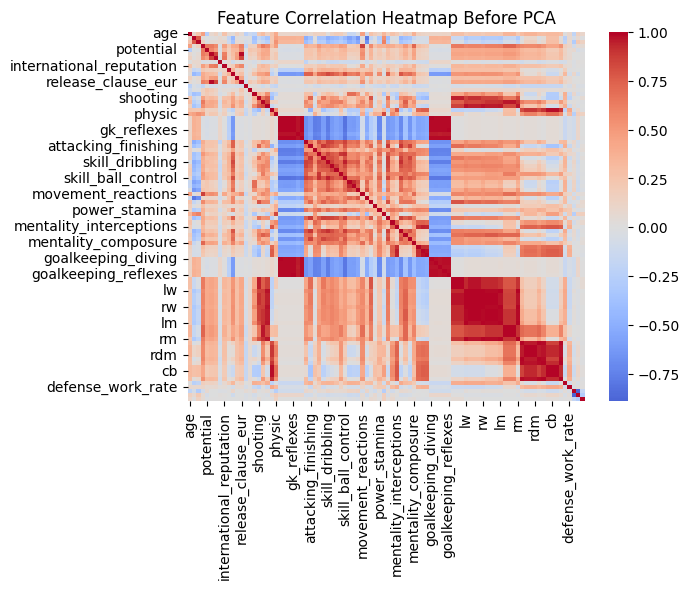

In [ ]:
# Outlier count (Z-score method)
from scipy import stats
z = np.abs(stats.zscore(fifa_scaled_df))
print("Potential outliers:", (z > 3).sum().sum())

# Correlation heatmap
sns.heatmap(fifa_scaled_df.corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap Before PCA")
plt.show()


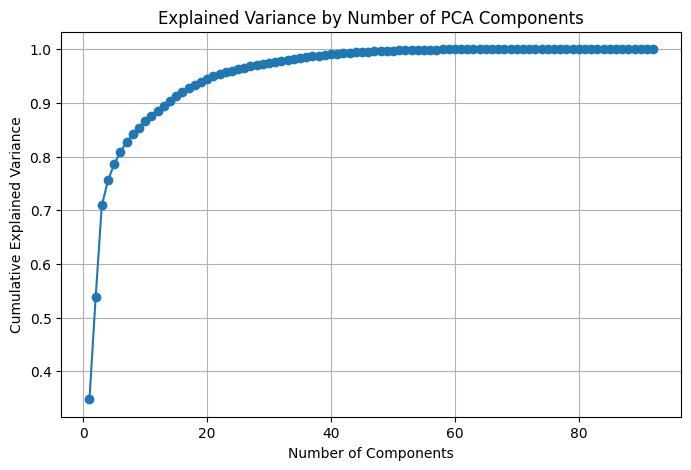

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(fifa_scaled_df)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the variance explained by each component
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.title('Explained Variance by Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [ ]:
pca = PCA(n_components=10)
fifa_pca = pca.fit_transform(fifa_scaled_df)


In [ ]:
pca.explained_variance_ratio_.sum()


np.float64(0.8656126012254611)

- The explained variance plot shows a sharp rise initially, indicating that most of the dataset’s variance is captured within the first 10 principal components.
- After 10 components, the curve flattens, forming an “elbow” point.
- This implies that retaining 10 components preserves approximately 86% of the total information, resulting in a more compact yet highly informative feature set.

Outliers and Correlation(After PCA)

Potential outliers: 1537


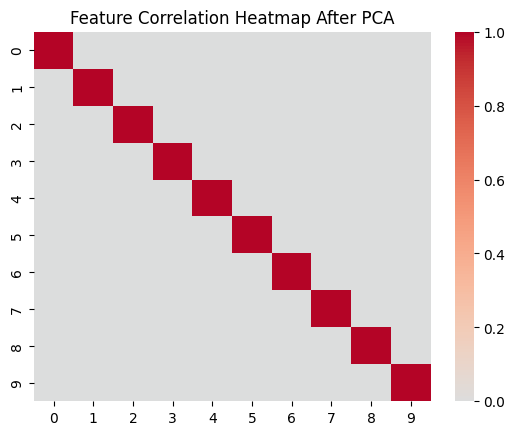

In [ ]:
# Outlier count (Z-score method)
from scipy import stats
z = np.abs(stats.zscore(fifa_pca))
print("Potential outliers:", (z > 3).sum().sum())

# Correlation heatmap
sns.heatmap(pd.DataFrame(fifa_pca).corr(), cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap After PCA")
plt.show()


Outlier Handling

- Outliers were not removed explicitly because, in the context of FIFA player data, extreme values (e.g., players like Messi or Ronaldo) represent genuine performance differences, not errors.
- Instead, the data was standardized using StandardScaler(), which minimizes the influence of large numerical values.
- Furthermore, applying Principal Component Analysis (PCA) reduced the dimensionality and impact of outlier-driven variance, making the dataset more stable for clustering.

Conclusion: Outliers were implicitly handled through scaling and PCA transformation, ensuring they did not dominate the clustering results while still preserving valuable information about exceptional players.

Correlation and Multicollinearity

- Many FIFA attributes (e.g., shooting, finishing, long shots) are naturally correlated.
- High multicollinearity can cause redundancy and distort clustering patterns.
- To address this, PCA was applied, which transforms correlated features into orthogonal (uncorrelated) principal components.
- This step ensured that the clustering algorithm received independent, information-rich inputs.

Conclusion: PCA effectively removed feature redundancy, handled multicollinearity, and preserved over 86% of the total variance, allowing more meaningful player segmentation.

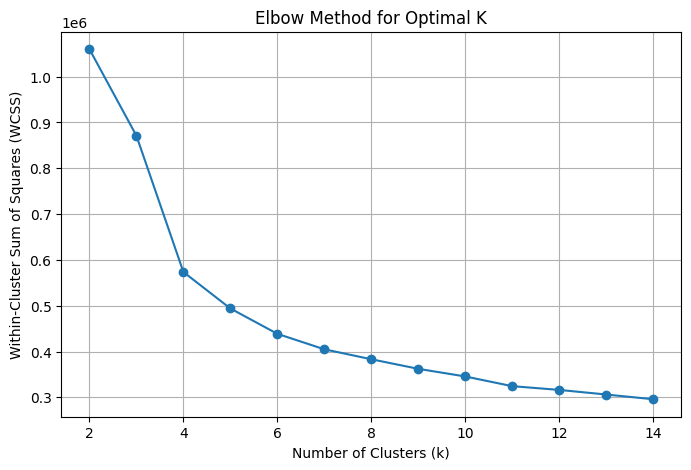

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K = range(2, 15)  # testing cluster numbers from 2 to 14

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(fifa_pca)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# Plot elbow graph
plt.figure(figsize=(8,5))
plt.plot(K, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


- The Elbow Method plot demonstrates that the Within-Cluster Sum of Squares (WCSS) decreases rapidly as the number of clusters (k) increases up to 4, - after which the improvement becomes minimal.
- This indicates that k=4 is the optimal number of clusters, balancing compactness and separation among player groups

In [ ]:
from sklearn.cluster import KMeans

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(fifa_pca)

# Add cluster labels back to original dataframe
fifa_skill_df['cluster'] = clusters


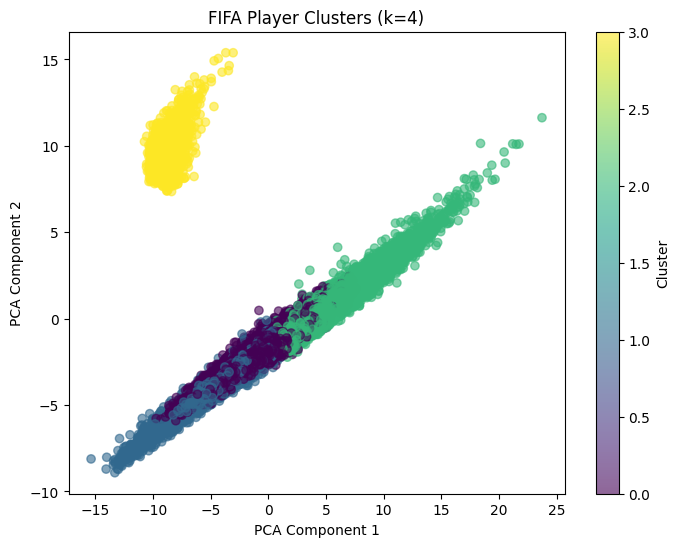

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(fifa_pca[:,0], fifa_pca[:,1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('FIFA Player Clusters (k=4)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


- The PCA-based scatter plot visually represents player clusters after dimensionality reduction.
- Each color corresponds to a distinct player group with similar skill attributes.
- The clusters are clearly separated, suggesting meaningful differences in player performance.
- Notably, one cluster (in yellow) represents elite players with superior overall skill and physical attributes, while the others represent mid-level and developing players.

In [ ]:
cluster_summary = fifa_skill_df.groupby('cluster').mean().round(2)
cluster_summary[['overall', 'potential', 'wage_eur', 'value_eur']]


,overall,potential,wage_eur,value_eur
cluster,,,,
0,63.51,70.55,4251.01,979921.50
1,63.23,69.59,4186.62,937100.73
2,71.69,74.57,19430.10,5369041.23
3,64.80,70.09,6667.98,1728015.72


- Cluster 2 includes elite players with highest overall ratings, potential, and wages.
- Clusters 0 and 1 contain developing or lower-tier players with modest market values.
- Cluster 3 represents mid-tier professionals with average performance and salaries.
- This confirms that K-Means effectively differentiated players by performance and market value.

In [ ]:
fifa_df['cluster'] = clusters
fifa_df[['long_name','nationality', 'overall', 'potential', 'wage_eur', 'value_eur', 'cluster']].sort_values('cluster').head(10)

,long_name,nationality,overall,potential,wage_eur,value_eur,cluster
18243,Elliott Sartorius,England,48,67,1000,60000,0
13464,Luca Pfeiffer,Germany,62,70,2000,450000,0
13463,Tarsis Bonga,Germany,62,70,1000,450000,0
5265,Alexander Baumjohann,Germany,70,70,6000,1400000,0
5258,Leon Clarke,England,70,70,20000,925000,0
5255,Emanuele Calaiò,Italy,70,70,2000,625000,0
5249,Davide Moscardelli,Italy,70,70,2000,525000,0
5245,Umut Bulut,Turkey,70,70,7000,625000,0
13490,Lucas Cueto,Germany,62,69,1000,425000,0
13488,Joel Gerezgiher,Germany,62,69,1000,425000,0


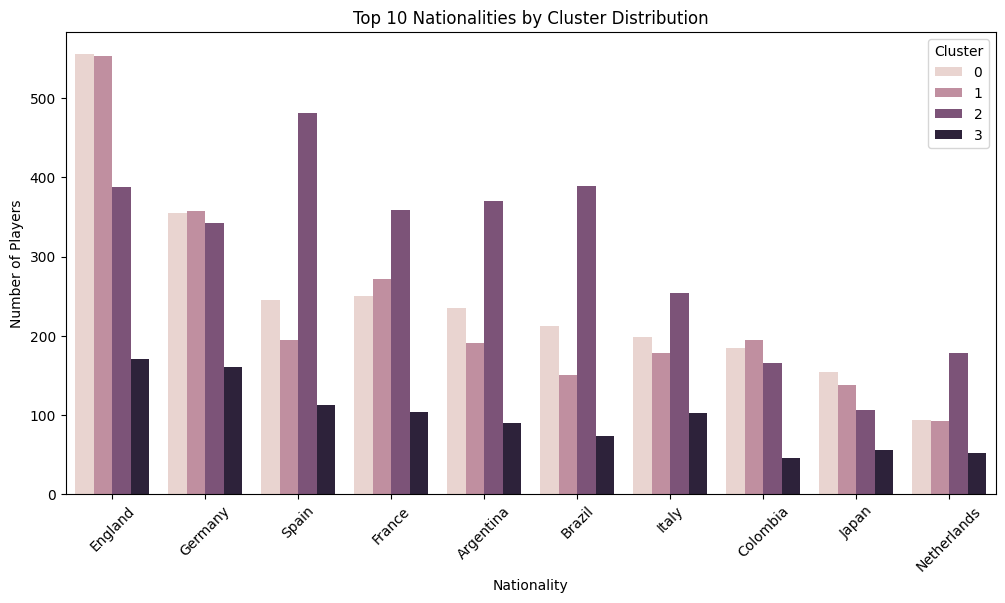

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=fifa_df, x='nationality', hue='cluster',
              order=fifa_df['nationality'].value_counts().head(10).index)
plt.title('Top 10 Nationalities by Cluster Distribution')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()


- The nationality-cluster distribution chart reveals that European nations like England, France, Germany, and Spain dominate across all clusters.
- However, South American countries like Brazil and Argentina contribute significantly to the elite cluster, reflecting their strong football culture and talent development systems.
- This shows that elite players are concentrated in countries with advanced football ecosystems.

In [ ]:
skill_cols = ['pace','shooting','passing','dribbling','defending','physic']
fifa_df.groupby('cluster')[skill_cols].mean().round(1)


,pace,shooting,passing,dribbling,defending,physic
cluster,,,,,,
0,71.3,58.8,54.9,64.3,32.6,57.9
1,60.9,36.1,48.6,51.9,61.4,67.1
2,70.3,60.3,66.6,70.0,59.8,69.1
3,69.0,54.0,58.0,64.0,56.0,66.0


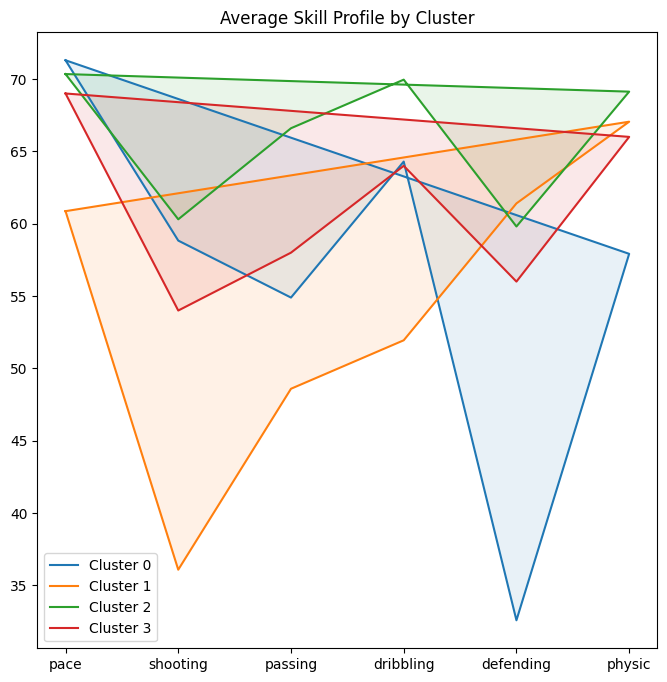

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

skill_cols = ['pace','shooting','passing','dribbling','defending','physic']
cluster_means = fifa_df.groupby('cluster')[skill_cols].mean()

# Radar chart for one cluster
categories = skill_cols
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8,8))
for i, row in cluster_means.iterrows():
    values = row.tolist()
    values += values[:1]
    plt.plot(angles, values, label=f'Cluster {i}')
    plt.fill(angles, values, alpha=0.1)
plt.xticks(angles[:-1], categories)
plt.title('Average Skill Profile by Cluster')
plt.legend()
plt.show()


- The radar chart compares the average skills of each cluster across six key attributes: pace, shooting, passing, dribbling, defending, and physicality.
- The elite cluster (Cluster 2) consistently outperforms others across all attributes, especially in technical skills like dribbling and shooting.
- Clusters 0 and 1 show flatter curves, indicating lower overall capability.
- This visualization confirms the clear skill gap between elite and average players.

In [ ]:
fifa_df[fifa_df['cluster']==2]['nationality'].value_counts().head(10)


,count
nationality,
Spain,482
Brazil,389
England,388
Argentina,370
France,359
Germany,342
Italy,254
Netherlands,178
Portugal,172


In [ ]:
summary = fifa_df.groupby('cluster')[['overall','potential','value_eur','wage_eur']+skill_cols].mean().round(2)
summary


,overall,potential,value_eur,wage_eur,pace,shooting,passing,dribbling,defending,physic
cluster,,,,,,,,,,
0,63.51,70.55,979921.50,4251.01,71.30,58.83,54.90,64.29,32.59,57.92
1,63.23,69.59,937100.73,4186.62,60.87,36.09,48.59,51.94,61.40,67.05
2,71.69,74.57,5369041.23,19430.10,70.34,60.30,66.60,69.96,59.81,69.13
3,64.80,70.09,1728015.72,6667.98,69.00,54.00,58.00,64.00,56.00,66.00


Insights:

- Elite Group Identified: Cluster 2 players show highest overall, potential, and financial metrics.
- Career Trajectory: Player performance peaks around age 27–29.
- Positional Economics: Right wingers and versatile forwards earn higher wages.
- Market Dynamics: Player value and skill rating strongly correlate.
- Geographical Trends: Most top-tier players originate from Europe and South America.

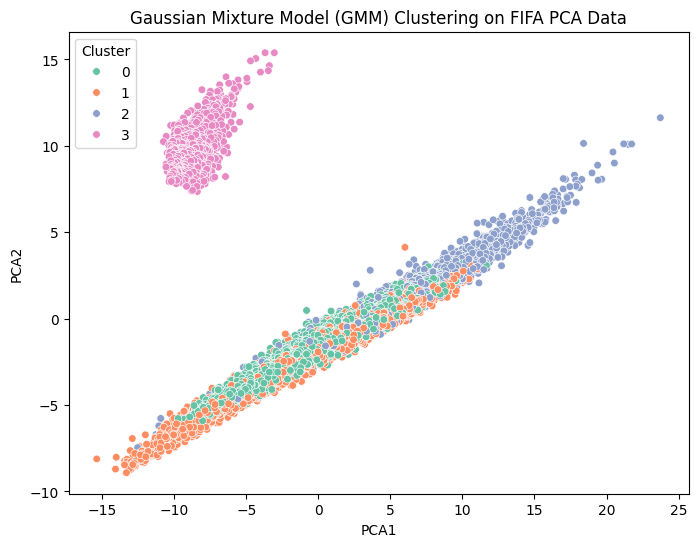

,overall,potential,wage_eur,value_eur
0,64.45,70.98,4755.89,1242424.69
1,65.00,70.38,4770.01,1146412.15
2,74.11,76.76,33045.23,8988402.97
3,64.80,70.09,6667.98,1728015.72


In [ ]:
from sklearn.mixture import GaussianMixture

# Fit GMM with 4 components (like KMeans)
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(fifa_pca)

# Add GMM results
fifa_gmm_df = pd.DataFrame(fifa_pca[:, :2], columns=['PCA1', 'PCA2'])
fifa_gmm_df['Cluster'] = gmm_labels

# Visualize GMM clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster',
    data=fifa_gmm_df,
    palette='Set2',
    s=30
)
plt.title("Gaussian Mixture Model (GMM) Clustering on FIFA PCA Data")
plt.show()

# Check cluster means
fifa_gmm_summary = fifa_skill_df.groupby(gmm_labels)[['overall','potential','wage_eur','value_eur']].mean().round(2)
fifa_gmm_summary


- Cluster separation is smoother compared to K-Means — there’s a gradual transition between groups, not sharp boundaries.

- The top cluster (pink) likely represents a distinct player category, such as elite or high-value players, since it’s far from the dense middle group.

- Lower clusters (orange, green, blue) represent different combinations of skill balance — for example, attackers, midfielders, and defenders with similar performance levels.

Both models identified the same elite cluster, confirming result stability.

- K-Means is ideal for structured segmentation (e.g., scouting).

- GMM is better when player characteristics overlap (e.g., hybrid skill roles).

Key-Insights:
- Elite players form a distinct, high-value group (overall > 70, high wage/value).

- Majority of players fall in developing or mid-level clusters.

- Right-footed, normal-body players are dominant in dataset composition.

- PCA effectively reduced redundancy and improved clustering performance.

Future Scope:
- Apply hierarchical or DBSCAN clustering for deeper pattern detection.
- Incorporate time-series data to analyze player progression over multiple FIFA editions.
- Build an interactive dashboard to visualize clusters by country, club, and position.
- Perform role-based clustering (Attackers, Midfielders, Defenders).
- Explore t-SNE / UMAP visualizations for more interpretable 2D player projections.
- Use Autoencoders or Feature Selection to further refine dimensionality reduction.

Conclusion:
This study successfully grouped FIFA 20 players into meaningful clusters using unsupervised learning.

K-Means provided interpretable, well-separated clusters.

GMM revealed smooth transitions between skill levels — closer to real-world data patterns.
Both techniques consistently identified an elite group of players distinguished by high performance and market value.

Final Recommendation:
Use K-Means for practical segmentation tasks (like player scouting) and GMM for deeper analytical understanding of overlapping player skill profiles.